In [1]:
#Introduction#
#this is a logistic regression model to predict the probability
#to survival of the Titanic passengers based on the features
# feature is Pclass,Sex,Age,Fare 
#target is Survived
#also calculate the accuracy, AUC, Recall of the model 

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


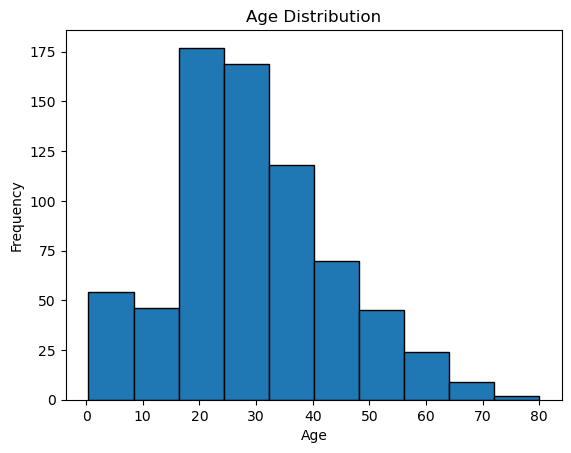

In [15]:
#importing Datasets
data = pd.read_csv('titanic.csv')
#age analyisys
plt.hist(data['Age'], bins=10, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



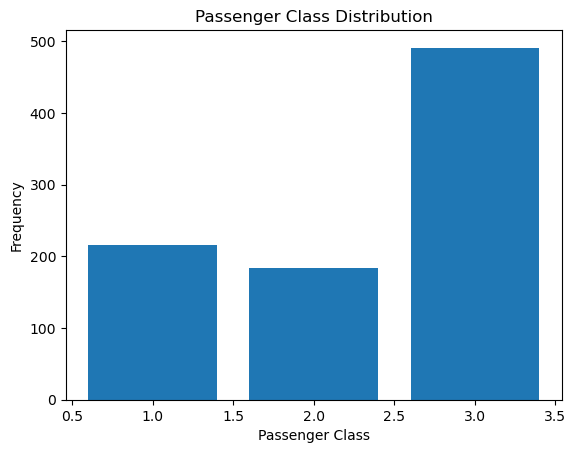

In [17]:
#pclass analysis
plt.bar(data['Pclass'].unique(), data['Pclass'].value_counts())
plt.title('Passenger Class Distribution')
plt.xlabel('Passenger Class')
plt.ylabel('Frequency')
plt.show()

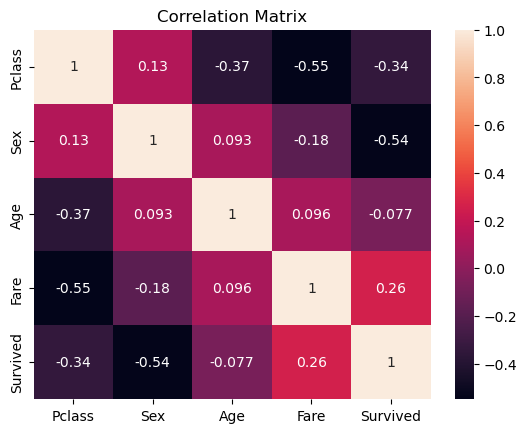

In [19]:
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
#heatmap of correlations
import seaborn as sns
corr_matrix = data[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [20]:

data['Age'].fillna(data['Age'].mean(),inplace=True)
#filling the missing values in Fare column
data['Fare'].fillna(data['Fare'].mean(),inplace=True)
# columns passenger,survived, Pclass,Sex,Age,Fare 
x = data[['Pclass','Sex','Age','Fare']].values
y= data['Survived'].values

In [21]:
#split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=7)

In [22]:
#information of array
print("size of x_train",x_train.shape)
print("size of x_test",x_test.shape)
print("size of y_train",y_train.shape)
print("size of y_test",y_test.shape)

size of x_train (623, 4)
size of x_test (268, 4)
size of y_train (623,)
size of y_test (268,)


In [23]:
#Important functions to calculate error and gradient decent and other things
#sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

#compute cost logistic function
def compute_cost(x,y,w,b):
    m = len(y)
    z = np.dot(x, w) + b
    a = sigmoid(z)
    epsilon = 1e-5  # small constant for log smoothing 
    # so that log never encounter negetive value
    cost = (1/m)*(((-y).T @ np.log(a + epsilon))-((1-y).T @ np.log(1-a + epsilon)))
    return cost

In [24]:
#testing compute cost funtion 
w_tmp, b_tmp = np.array([1,1,1,1]),-3
print("Cost = " ,compute_cost(x_train,y_train,w_tmp,b_tmp))

Cost =  7.262563732200693


In [25]:
#Gradent decent function 
def compute_gredent_descent(x,y,w,b,alpha,iters):
    m = len(y)
    for i in range(iters):
        a= sigmoid(np.dot(x,w) + b)
        dw = (1/m)*np.dot(x.T,(a-y))
        db = (1/m)*np.sum(a-y)
        w = w - alpha*dw
        b = b - alpha*db
        cost = compute_cost(x,y,w,b)
        print("Cost after iteration ",i," is ",cost)
    return w,b


In [26]:
#initalizing parameters
w = np.zeros(4)
b=0
w_final,b_final = compute_gredent_descent(x_train,y_train,w,b,0.01,500) 


Cost after iteration  0  is  0.6347771939382764
Cost after iteration  1  is  0.6632174863002048
Cost after iteration  2  is  1.1986233666885318
Cost after iteration  3  is  2.2626747854698235
Cost after iteration  4  is  1.666432911591808
Cost after iteration  5  is  1.5789849566522216
Cost after iteration  6  is  1.1794728274433341
Cost after iteration  7  is  0.8873937930740647
Cost after iteration  8  is  0.8533728439613185
Cost after iteration  9  is  1.1759333784946304
Cost after iteration  10  is  1.8493596702175215
Cost after iteration  11  is  1.655008108328864
Cost after iteration  12  is  1.3936462324759054
Cost after iteration  13  is  1.2057054242872045
Cost after iteration  14  is  1.0957193029512915
Cost after iteration  15  is  1.0807886575109384
Cost after iteration  16  is  1.3416094387080626
Cost after iteration  17  is  1.8638680034311461
Cost after iteration  18  is  1.329846188187
Cost after iteration  19  is  1.0158459301285925
Cost after iteration  20  is  0.9527

In [27]:
print("Final Weights ",w_final.shape)
print("Final Bias ",b_final)


Final Weights  (4,)
Final Bias  0.013545549460161767


In [28]:
y_pred = np.round(sigmoid(np.dot(x_test,w_final) + b_final))

In [29]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'AUC: {roc_auc_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')

Accuracy: 0.7164179104477612
AUC: 0.7110805860805861
Recall: 0.6785714285714286
